## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.49803094, 0.33140825, 0.99219413],
       [0.62115007, 0.29233049, 0.70824738],
       [0.14581228, 0.43986106, 0.14363464],
       [0.63357616, 0.70712787, 0.9252272 ],
       [0.9317031 , 0.98424173, 0.8088179 ]])

In [3]:
print(f"Размеры: {a.shape}")

Размеры: (5, 3)


In [4]:
print(f"Добавили 5:\n{a + 5}")

Добавили 5:
[[5.49803094 5.33140825 5.99219413]
 [5.62115007 5.29233049 5.70824738]
 [5.14581228 5.43986106 5.14363464]
 [5.63357616 5.70712787 5.9252272 ]
 [5.9317031  5.98424173 5.8088179 ]]


In [5]:
print(f"Посчитали произведение X X^T:\n{a @ a.T}")

Посчитали произведение X X^T:
[[1.34231543 1.10895159 0.36090605 1.46789353 1.59270717]
 [1.10895159 0.97289889 0.32088496 1.25555066 1.43929448]
 [0.36090605 0.32088496 0.23536988 0.53631587 0.68495763]
 [1.46789353 1.25555066 0.53631587 1.75749394 2.03462995]
 [1.59270717 1.43929448 0.68495763 2.03462995 2.49098886]]


In [6]:
print(f"Среднее по колонкам:\n{a.mean(axis=-1)}")

Среднее по колонкам:
[0.60721111 0.54057598 0.24310266 0.75531041 0.90825424]


In [7]:
print(f"Изменили размеры: {a.reshape(3, 5).shape}")

Изменили размеры: (3, 5)


#### Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [23]:
# YOUR CODE

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [24]:
x = torch.rand(5, 3)
x

tensor([[0.2140, 0.6696, 0.7240],
        [0.4310, 0.0536, 0.8582],
        [0.4818, 0.3731, 0.8224],
        [0.3555, 0.5991, 0.5583],
        [0.9455, 0.4990, 0.7068]])

In [25]:
print(f"Размеры: {x.shape}")

Размеры: torch.Size([5, 3])


In [26]:
print(f"Добавили 5:\n{x + 5}")

Добавили 5:
tensor([[5.2140, 5.6696, 5.7240],
        [5.4310, 5.0536, 5.8582],
        [5.4818, 5.3731, 5.8224],
        [5.3555, 5.5991, 5.5583],
        [5.9455, 5.4990, 5.7068]])


In [28]:
# для перемножения тензоров высокой размерности читайте документацию по различным вариантам:
# torch.mm, torch.matmul, torch.bmm, @
print(f"X X^T  (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T  (2):\n{x.mm(x.t())}")

X X^T  (1):
tensor([[1.0183, 0.7494, 0.9483, 0.8814, 1.0482],
        [0.7494, 0.9252, 0.9334, 0.6645, 1.0409],
        [0.9483, 0.9334, 1.0476, 0.8539, 1.2230],
        [0.8814, 0.6645, 0.8539, 0.7970, 1.0297],
        [1.0482, 1.0409, 1.2230, 1.0297, 1.6426]])

X X^T  (2):
tensor([[1.0183, 0.7494, 0.9483, 0.8814, 1.0482],
        [0.7494, 0.9252, 0.9334, 0.6645, 1.0409],
        [0.9483, 0.9334, 1.0476, 0.8539, 1.2230],
        [0.8814, 0.6645, 0.8539, 0.7970, 1.0297],
        [1.0482, 1.0409, 1.2230, 1.0297, 1.6426]])


In [29]:
print(f"Среднее по колонкам:\n{x.mean(dim=-1)}")

Среднее по колонкам:
tensor([0.5359, 0.4476, 0.5591, 0.5043, 0.7171])


In [30]:
print(f"Изменили размеры:\n{x.view([3, 5]).shape}\n")

# будьте внимательны и не используйте view для транспонирования осей
print(f"По-другому изменили размеры:\n{x.view_as(x.t()).shape}\n")
print(f"Но не транспонировали!\n{x.view_as(x.t()) == x.t()}")

Изменили размеры:
torch.Size([3, 5])

По-другому изменили размеры:
torch.Size([3, 5])

Но не транспонировали!
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])


Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [86]:
# YOUR CODE
torch.sum(torch.arange(1, 10000 + 1)**2)

tensor(333383335000)

### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [92]:
x = torch.empty(5, 3)  # пустой тензор
print(x)

tensor([[1.0561e-38, 1.0653e-38, 4.1327e-39],
        [8.9082e-39, 9.8265e-39, 9.4592e-39],
        [1.0561e-38, 1.0653e-38, 1.0469e-38],
        [9.5510e-39, 8.7245e-39, 9.6429e-39],
        [9.6429e-39, 8.7245e-39, 4.2246e-39]])


In [93]:
x = torch.rand(5, 3)  # случайный тензор
print(x)

tensor([[0.7739, 0.2574, 0.3881],
        [0.4934, 0.8252, 0.2661],
        [0.8795, 0.1672, 0.4857],
        [0.1852, 0.2615, 0.1908],
        [0.5042, 0.7935, 0.9162]])


In [94]:
x = torch.zeros(5, 3, dtype=torch.float32)  # тензор с нулями и указанием типов чисел
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [101]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [103]:
x1 = x.new_ones(5, 3, dtype=torch.double)  # используем уже созданный тензор для создания тензора из единичек
print(x1, x1.size()) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([5, 3])


In [104]:
x = torch.randn_like(x1, dtype=torch.float)  # создаем случайный тензор с размерами x
print(x, x.size())

tensor([[-0.0487,  0.3883, -0.8117],
        [ 0.0529, -1.1389,  0.3662],
        [-0.0913, -1.2695, -0.3967],
        [-1.9362, -0.0896,  1.0593],
        [ 0.7158, -0.4237, -2.2518]]) torch.Size([5, 3])


In [105]:
y = torch.rand(5, 3)
print(x + y)  # операция сложения

tensor([[ 0.2488,  0.8078, -0.1348],
        [ 0.8766, -0.2184,  0.6611],
        [ 0.4884, -0.5624, -0.2091],
        [-1.6839,  0.5176,  1.6600],
        [ 1.2233, -0.1752, -1.6131]])


In [106]:
z = torch.add(x, y)  # очередная операция сложения
print(z)

tensor([[ 0.2488,  0.8078, -0.1348],
        [ 0.8766, -0.2184,  0.6611],
        [ 0.4884, -0.5624, -0.2091],
        [-1.6839,  0.5176,  1.6600],
        [ 1.2233, -0.1752, -1.6131]])


In [107]:
torch.add(x, y, out=z)  # и наконец последний вид
print(z)

tensor([[ 0.2488,  0.8078, -0.1348],
        [ 0.8766, -0.2184,  0.6611],
        [ 0.4884, -0.5624, -0.2091],
        [-1.6839,  0.5176,  1.6600],
        [ 1.2233, -0.1752, -1.6131]])


In [108]:
print(x * y)  # поэлементное умножение

tensor([[-0.0145,  0.1629, -0.5494],
        [ 0.0436, -1.0483,  0.1080],
        [-0.0529, -0.8976, -0.0744],
        [-0.4885, -0.0544,  0.6364],
        [ 0.3633, -0.1053, -1.4380]])


In [109]:
print(x @ y.t())  # матричное умножение

tensor([[-0.4009,  0.0779,  0.0941, -0.2641, -0.4465],
        [-0.2142, -0.8967, -0.7060, -0.4582, -0.0223],
        [-0.8282, -1.3606, -1.0249, -1.0322, -0.6151],
        [ 0.1034, -1.3649, -0.9869,  0.0935, -0.3284],
        [-1.4889, -0.4645, -0.3070, -1.4294, -1.1801]])


In [110]:
print(x.mm(y.t()))  # и опять матричное умножение

tensor([[-0.4009,  0.0779,  0.0941, -0.2641, -0.4465],
        [-0.2142, -0.8967, -0.7060, -0.4582, -0.0223],
        [-0.8282, -1.3606, -1.0249, -1.0322, -0.6151],
        [ 0.1034, -1.3649, -0.9869,  0.0935, -0.3284],
        [-1.4889, -0.4645, -0.3070, -1.4294, -1.1801]])


In [111]:
print(x.unsqueeze(0).shape)  # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [112]:
print(x.unsqueeze(0).unsqueeze(1).squeeze().shape)  # убрали измерение в начале

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [113]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

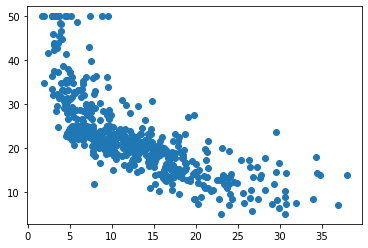

In [116]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

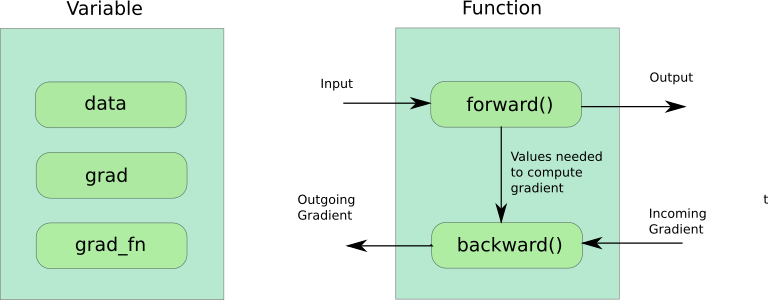

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [143]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [144]:
y_pred = w * x + b                    # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y) ** 2)  # совершаем операции с тензорами
loss.backward()                       # считаем градиенты

In [145]:
# сделали операции и посчитали градиенты, значение должно было появится
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-11.7967])
dL/db = 
 tensor([-43.0956])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [146]:
w.data

tensor([0.2482])

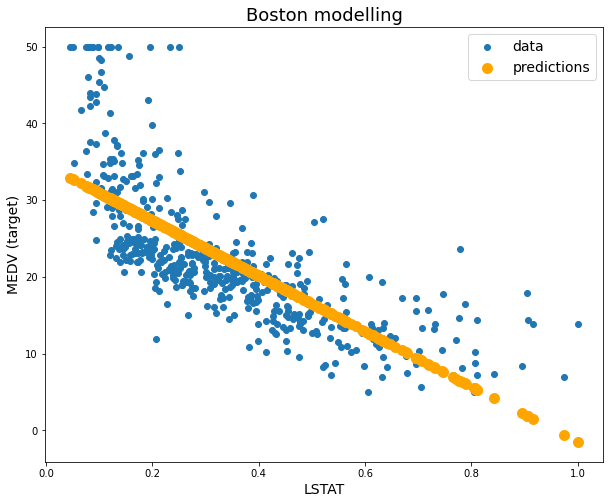

loss =  38.482967


In [153]:
from IPython.display import clear_output

for i in range(1000):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -=  0.05 * w.grad# YOUR CODE
    b.data -=  0.05 * b.grad# YOUR CODE

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже - нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```python
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [189]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [190]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [191]:
our_dataset = RandomDataset(x, y)

In [192]:
our_dataset.__getitem__(1)

{'sample': tensor([0.1119, 0.4750, 0.6929, 0.3158, 0.8826]),
 'target': 0.887012526428211}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [162]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [195]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.1742, 0.3691, 0.3057, 0.7394, 0.2346],
        [0.1119, 0.4750, 0.6929, 0.3158, 0.8826],
        [0.1510, 0.6335, 0.1908, 0.2103, 0.6664],
        [0.6050, 0.9753, 0.6482, 0.1794, 0.3867]])
Target:
tensor([0.1478, 0.8870, 0.8620, 0.0905], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```python
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [196]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 10))  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(10, 1))  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [198]:
y_pred = model(batch['sample']) # получили предсказания модели
y_pred

tensor([[-0.1477],
        [-0.2518],
        [-0.2702],
        [-0.3471]], grad_fn=<AddmmBackward0>)

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [199]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



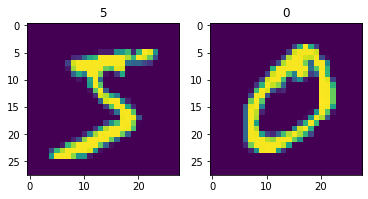

In [200]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [202]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

Веса моделей хранятся в виде матриц и выглядят так:

In [203]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[-0.0282, -0.0121,  0.0166,  ..., -0.0260, -0.0278, -0.0147],
          [-0.0196, -0.0130, -0.0147,  ...,  0.0198,  0.0128, -0.0070],
          [-0.0210, -0.0062,  0.0325,  ...,  0.0343, -0.0062,  0.0320],
          ...,
          [ 0.0183, -0.0120, -0.0296,  ...,  0.0088, -0.0077, -0.0332],
          [ 0.0174,  0.0082,  0.0003,  ..., -0.0037,  0.0284,  0.0315],
          [-0.0342, -0.0224, -0.0002,  ...,  0.0154, -0.0283, -0.0247]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 2.9393e-02, -8.9669e-03, -2.1632e-03,  5.9055e-03, -1.2635e-02,
          -9.4151e-03, -3.2285e-02, -1.5041e-02,  8.5730e-03, -1.6560e-02,
          -2.2352e-02,  1.8726e-02,  2.4625e-03,  1.3936e-02,  1.5794e-02,
           6.1516e-03,  6.8880e-03, -2.0618e-02, -1.1401e-02,  2.6140e-02,
          -1.5277e-02,  2.4932e-02,  2.3898e-02, -1.3590e-02, -1.9307e-02,
          -3.2514e-02,  1.7636e-02, -1.7674e-02, -1.1722e-02, -3.2707e-0

_Красиво_ трекать метрики в полуавтоматическом режиме мы будем в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся(это того стоит):

In [206]:
# !pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\bimas/.netrc
wandb: Currently logged in as: bimastics (use `wandb login --relogin` to force relogin)


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [209]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс F = torch.nn.functional
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
          
        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})
        
        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.09171060472726822, accuracy: 0.9788


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08363435417413712, accuracy: 0.9813


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.0857161283493042, accuracy: 0.9815


### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)